# 1. Check Dependencies are Installed in our venv

In [139]:
!pip list #check a list of Dependencies

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.3.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.0
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.0
flatbuffers                  23.5.26
fonttools                    4.43.0
gast                         0.4.0
google-auth                  2.23.2
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.59.0
h5py                         3.9.0
idna                         3.4
importlib-metadata           6.8.0
importlib-resources          6.1.0
ipykernel                    6.25.2
ipyth

# 1. Install Dependencies and Setup

In [140]:
!pip install tensorflow opencv-python matplotlib

In [141]:
!pip list #check list agin

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.3.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.0
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.0
flatbuffers                  23.5.26
fonttools                    4.43.0
gast                         0.4.0
google-auth                  2.23.2
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.59.0
h5py                         3.9.0
idna                         3.4
importlib-metadata           6.8.0
importlib-resources          6.1.0
ipykernel                    6.25.2
ipyth

In [142]:
import tensorflow as tf #import tensorflow as tf
import os #import os

In [143]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpuList = tf.config.experimental.list_physical_devices('GPU') # get all of physical GPU devices allowcated for tensaflow
for gpu in gpuList: 
    tf.config.experimental.set_memory_growth(gpu, True) # limit the GPU memory growth getting one by one from gpu List

In [144]:
tf.config.list_physical_devices('GPU') #check physical GPU devices

[]

# 2. Delete any questionable photos.

In [145]:
import cv2
import imghdr

In [146]:
data_directory = '..\data' #give path of data directory

In [147]:
image_types = ['jpeg','jpg', 'bmp', 'png'] #store extentions of exist data types

In [148]:
for image_class in os.listdir(data_directory): #get list of directories inside the data directory ex:-['happy','sad']
    for image in os.listdir(os.path.join(data_directory, image_class)):#get every single image from data sub directories -> '../data/happy' -> 465464.png
        image_path = os.path.join(data_directory, image_class, image)#create a new path for image inside of data sub directory 
        try: 
            img = cv2.imread(image_path)#loads an image from the specified file
            tip = imghdr.what(image_path)
            if tip not in image_types: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)# os will remove image from listed image path in here
        except Exception as e: 
            print('Issue with image {}'.format(image_path))# if got an error exception will print it is as an issue

# 3. Load Data

In [149]:
import numpy as np #import numpy as np
from matplotlib import pyplot as plt #import pyplot as plt

In [150]:
data = tf.keras.utils.image_dataset_from_directory(data_directory) #Generates a tf.data.Dataset from image files in a directory.

Found 161 files belonging to 2 classes.


In [151]:
data_iterator = data.as_numpy_iterator() #image_dataset_from_directory returns a Dataset object and get it as an as_numpy_iterator

In [152]:
batch = data_iterator.next() #To get the next batch, and the next image

In [153]:
batch[0].shape

(32, 256, 256, 3)

In [154]:
# Class 0 - ANGRY
# Class 1 - HAPPY
# Class 2 - SAD
batch[1]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1])

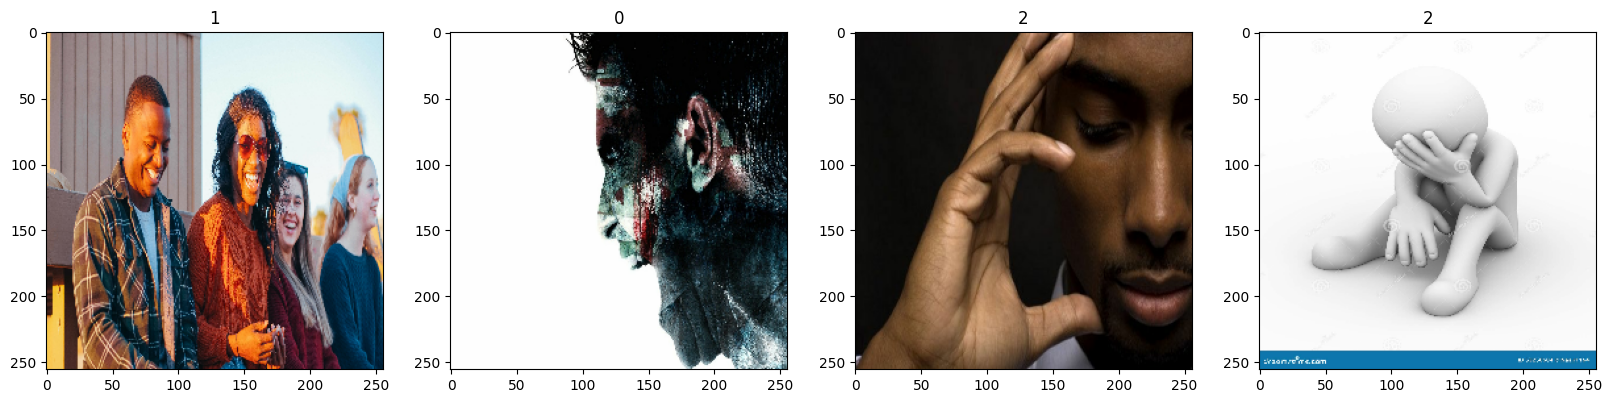

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) # create common layouts of subplots, including the enclosing figure object, in a single call.
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))#do visualization in here
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [34]:
data = data.map(lambda x,y: (x/255, y))#each element of this dataset, and returns a new dataset containing the transformed elements (adding 1 to each element, or projecting a subset of element components)

In [35]:
data.as_numpy_iterator().next() #To get the next batch, and the next image

(array([[[[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.26341817, 0.16537894, 0.08694758],
          [0.34592944, 0.24789022, 0.16945885],
          [0.34868345, 0.26633048, 0.18397756]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.42276493, 0.3247257 , 0.24629433],
          [0.31461146, 0.21657224, 0.13814087],
          [0.32780164, 0.24152713, 0.15917419]],
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.31547743, 0.21743822, 0.13900685],
          [0.28784263, 0.18980342, 0.11137205],
          [0.30726102, 0.20352328, 0.12794118]],
 
         ...,
 
         [[0.6354742 , 0.62763107, 0.6707683 ],
          [0.63975

In [155]:
len(data)

6

# 5. Split Data

In [156]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [157]:
train_size+val_size+test_size

5

In [158]:
train = data.take(train_size) #train partition
val = data.skip(train_size).take(val_size) #validate partition
test = data.skip(train_size+val_size).take(test_size) #test partition

In [159]:
len(test)

0

# 6. Build Deep Learning Model

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [161]:
model = Sequential()

In [162]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [163]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [164]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [190]:
logdir='..\logs'

In [191]:
logdir

'..\\logs'

In [192]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [193]:
logdir

'..\\logs'

In [194]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])#get predictions

Epoch 1/20
4/4 [==============================] - 5s 1s/step - loss: 1.1466e-04 - accuracy: 1.0000 - val_loss: 9.6314e-06 - val_accuracy: 1.0000
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 5.1580e-05 - accuracy: 1.0000 - val_loss: 4.4266e-05 - val_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 2.7047e-05 - accuracy: 1.0000 - val_loss: 1.4469e-06 - val_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 1.1701e-05 - accuracy: 1.0000 - val_loss: 7.8626e-06 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 1.0973e-05 - accuracy: 1.0000 - val_loss: 8.5447e-06 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 6.4259e-06 - accuracy: 1.0000 - val_loss: 1.2174e-05 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 5.5782e-06 - accuracy: 1.0000 - val_loss: 5.4871e-06 - val_ac

# 8. Plot Performance

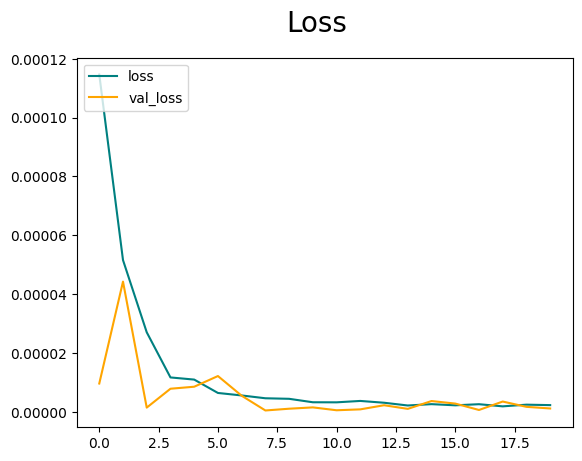

In [195]:
#find loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

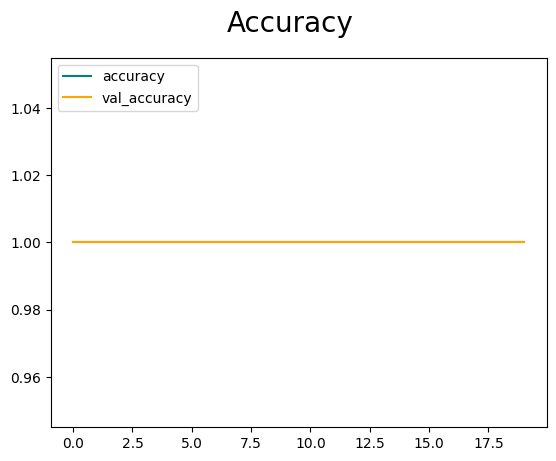

In [196]:
# find accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [197]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [198]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [199]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [200]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [201]:
import cv2

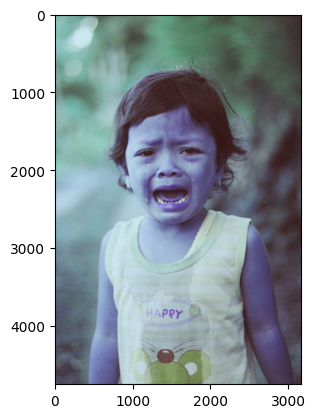

In [202]:
img = cv2.imread('arwan-sutanto-H566W24FyL8-unsplash.jpg')
plt.imshow(img)
plt.show()

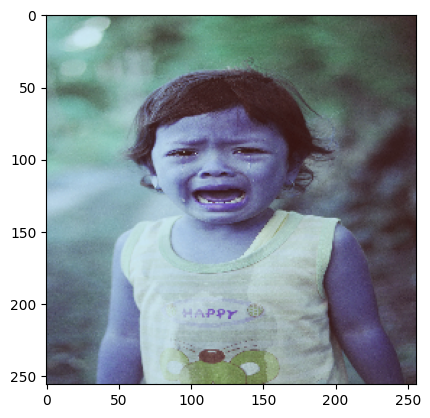

In [203]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [204]:
resize.shape
np.expand_dims (resize, 0).shape

(1, 256, 256, 3)

In [205]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 41ms/step


In [206]:
print(yhat)

[[0.5160758]]


In [207]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [208]:
from tensorflow.keras.models import load_model

In [209]:
model.save(os.path.join('..\models','imageclassifier.h5'))

In [211]:
new_model = load_model('..\models\imageclassifier.h5')

In [212]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 103ms/step


array([[0.5160758]], dtype=float32)